In [1]:
# pip install fedot

In [2]:
# FEDOT api
from fedot.api.main import Fedot# Tasks to solve
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams# Input data for fit and predict
from fedot.core.data.data import InputData# Train and test split
#from fedot.core.data.data import train_test_data_setup
from fedot.core.data.data_split import train_test_data_setup

In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# FEDOT API

In [4]:
df=pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.shape[0]

2788

In [6]:
df.sort_values(by='Date', inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d'))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2783,2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490


In [8]:
df = df.drop_duplicates(subset=['Date'], keep='first')

In [9]:
df = df.reset_index()

In [10]:
cols = ['Date', 'Open']
df = df[cols]
df.head()

,Date,Open
0,2014-09-17,465.864014
1,2014-09-18,456.859985
2,2014-09-19,424.102997
3,2014-09-20,394.673004
4,2014-09-21,408.084991


In [11]:
df = df[df['Date'] >= '2020-05-06']
df = df.reset_index()
cols = ['Date', 'Open']
df = df[cols]

In [12]:
df.to_csv(r'BTC-USD-2020-and-after.csv')

In [13]:
df

,Date,Open
0,2020-05-06,9007.441406
1,2020-05-07,9261.895508
2,2020-05-08,9936.162109
3,2020-05-09,9840.906250
4,2020-05-10,9591.168945
...,...,...
725,2022-05-01,37713.265625
726,2022-05-02,38472.187500
727,2022-05-03,38528.109375
728,2022-05-04,37748.011719


In [14]:
forecast_length = 20
task = Task(TaskTypesEnum.ts_forecasting, TsForecastingParams(forecast_length=forecast_length))

In [15]:
# Load data from csv file and wrap it into InputData structure
input_data = InputData.from_csv_time_series(task, 'BTC-USD-2020-and-after.csv', target_column='Open')# Divide into train and test
train_data, test_data = train_test_data_setup(input_data)

In [16]:
# Init model for the time series forecasting
model = Fedot(problem='ts_forecasting',task_params=task.task_params)# Run AutoML model design
chain = model.fit(features=train_data)# Use model to obtain forecast
forecast = model.predict(features=test_data)

Generations:   1%|▊                                                                           | 1/100 [00:00<?, ?gen/s]

Number of used CPU's: 1
Number of used CPU's: 1
Number of used CPU's: 1


Generations:   2%|█▎                                                                | 2/100 [01:01<1:40:48, 61.72s/gen]

Number of used CPU's: 1


Generations:   3%|██                                                                  | 3/100 [01:18<56:44, 35.10s/gen]

Number of used CPU's: 1


Generations:   4%|██▋                                                                 | 4/100 [01:43<48:42, 30.44s/gen]

Number of used CPU's: 1


Generations:   5%|███▍                                                                | 5/100 [02:17<50:26, 31.86s/gen]

Number of used CPU's: 1


Generations:   6%|████                                                                | 6/100 [02:46<52:17, 33.37s/gen]

Hyperparameters optimization start


  8%|███▌                                          | 77/1000 [02:12<26:26,  1.72s/trial, best loss: 2978.0783940930633]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 2978.078 equal or smaller than initial (+ 5% deviation) 3712.760


In [17]:
len(forecast)

20

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error
traffic = np.array(df['Open'])
def display_results(actual_time_series, predicted_values, len_train_data, y_name = 'Bitcoin volume'): 
        
    plt.plot(np.arange(0, len(actual_time_series)), actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
  
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()
    #plt.savefig('eth.png')

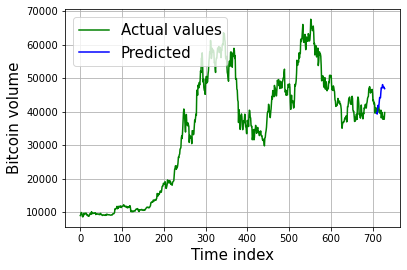

In [19]:
display_results(df['Open'], forecast, 730-len(forecast), y_name = 'Bitcoin volume')

In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error
traffic = np.array(df['Open'])
def display_results_zoomed_in(actual_time_series, predicted_values, len_train_data, y_name = 'Bitcoin volume'): 
        
    plt.plot(np.arange(0, len(actual_time_series)), actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
  
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.xlim(690,730)
    plt.show()
    plt.savefig('eth.png')

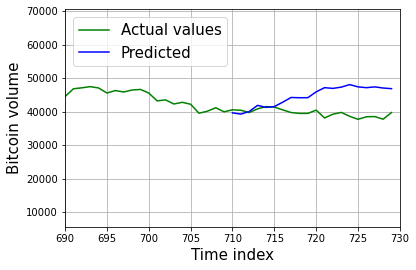

<Figure size 432x288 with 0 Axes>

In [21]:
display_results_zoomed_in(df['Open'], forecast, 730-len(forecast), y_name = 'Bitcoin volume')

In [22]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(df['Open'][len(df)-len(forecast):], forecast)
print(f'MAE value: {mae_value}')

MAE value: 5135.241602072615


# AUTO SKLEARN API

In [23]:
# pip install skforecast --user

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = df
data

,Date,Open
0,2020-05-06,9007.441406
1,2020-05-07,9261.895508
2,2020-05-08,9936.162109
3,2020-05-09,9840.906250
4,2020-05-10,9591.168945
...,...,...
725,2022-05-01,37713.265625
726,2022-05-02,38472.187500
727,2022-05-03,38528.109375
728,2022-05-04,37748.011719


In [26]:
data = data.set_index('Date')
data = data.rename(columns={'Open': 'y'})

In [27]:
data = data.sort_index()
data.head()

,y
Date,
2020-05-06,9007.441406
2020-05-07,9261.895508
2020-05-08,9936.162109
2020-05-09,9840.906250
2020-05-10,9591.168945


In [28]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [29]:
data.index.max()

Timestamp('2022-05-05 00:00:00')

In [30]:
data.shape[0]

730

Train dates : 2020-05-06 00:00:00 --- 2022-04-16 00:00:00  (n=711)
Test dates  : 2022-04-16 00:00:00 --- 2022-05-05 00:00:00  (n=20)


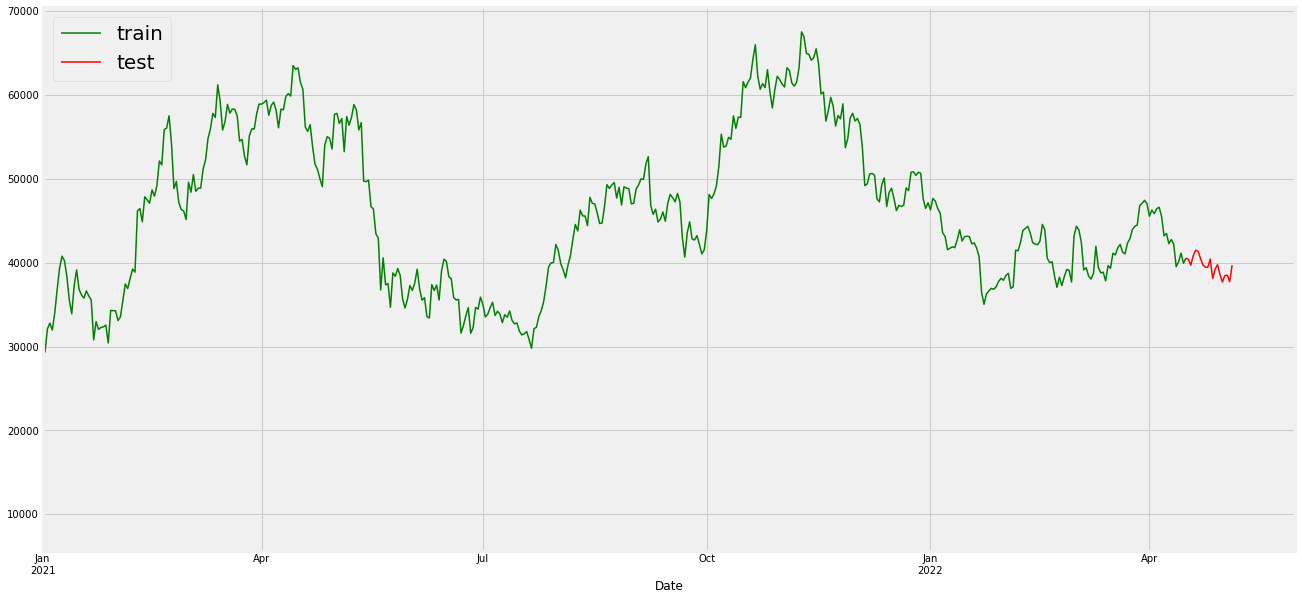

In [31]:
#steps = int(0.3*data.shape[0])
steps = 20
data_train = data[:len(data)-steps+1]
data_test  = data[len(data)-steps:]


print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(20, 10))
data_train['y'].plot(ax=ax, label='train', color='green')
data_test['y'].plot(ax=ax, label='test', color = 'red')
plt.xlim('2021-01-01','2022-05-31')
plt.legend(fontsize = 20, loc='upper left')
plt.show()

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
target=scaler.fit_transform(np.array(data_train['y']).reshape(-1,1))

In [33]:
data_train['fitted'] = target
data_train

,y,fitted
Date,,
2020-05-06,9007.441406,0.006737
2020-05-07,9261.895508,0.011054
2020-05-08,9936.162109,0.022494
2020-05-09,9840.906250,0.020878
2020-05-10,9591.168945,0.016641
...,...,...
2022-04-12,39533.714844,0.524664
2022-04-13,40123.570313,0.534671
2022-04-14,41160.218750,0.552260


In [34]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),lags = 6)
#forecaster.fit(y=data_train['y'])
forecaster.fit(y = data_train['fitted'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 710] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-11 23:58:41 
Last fit date: 2022-06-11 23:58:41 
Skforecast version: 0.4.3 

In [35]:
predictions = forecaster.predict(steps=steps).to_frame()
predictions

,pred
711,0.530012
712,0.524127
713,0.532703
714,0.534570
715,0.534581
716,0.531367
717,0.530356
718,0.532381
719,0.533963
720,0.534870


In [36]:
actual_fitted_pred = predictions['pred'].to_numpy()

In [37]:
actual_pred = scaler.inverse_transform(actual_fitted_pred.reshape(-1, 1))

In [38]:
actual_pred

array([[39848.94277364],
       [39502.10804704],
       [40007.56214859],
       [40117.61957054],
       [40118.25429711],
       [39928.83882834],
       [39869.20804708],
       [39988.58492208],
       [40081.84628927],
       [40135.26449241],
       [39867.98621116],
       [39767.90136741],
       [39998.66496114],
       [40176.25277363],
       [39896.74250019],
       [39822.00066427],
       [39998.6038674 ],
       [40149.68523456],
       [39861.51996112],
       [39792.53179708]])

In [39]:
data_test['predictions'] = actual_pred

In [40]:
#data_test['predictions'] = predictions['pred'].values

In [41]:
data_test

,y,predictions
Date,,
2022-04-16,40552.316406,39848.942774
2022-04-17,40417.777344,39502.108047
2022-04-18,39721.203125,40007.562149
2022-04-19,40828.175781,40117.619571
2022-04-20,41501.746094,40118.254297
2022-04-21,41371.515625,39928.838828
2022-04-22,40525.863281,39869.208047
2022-04-23,39738.722656,39988.584922
2022-04-24,39478.375000,40081.846289


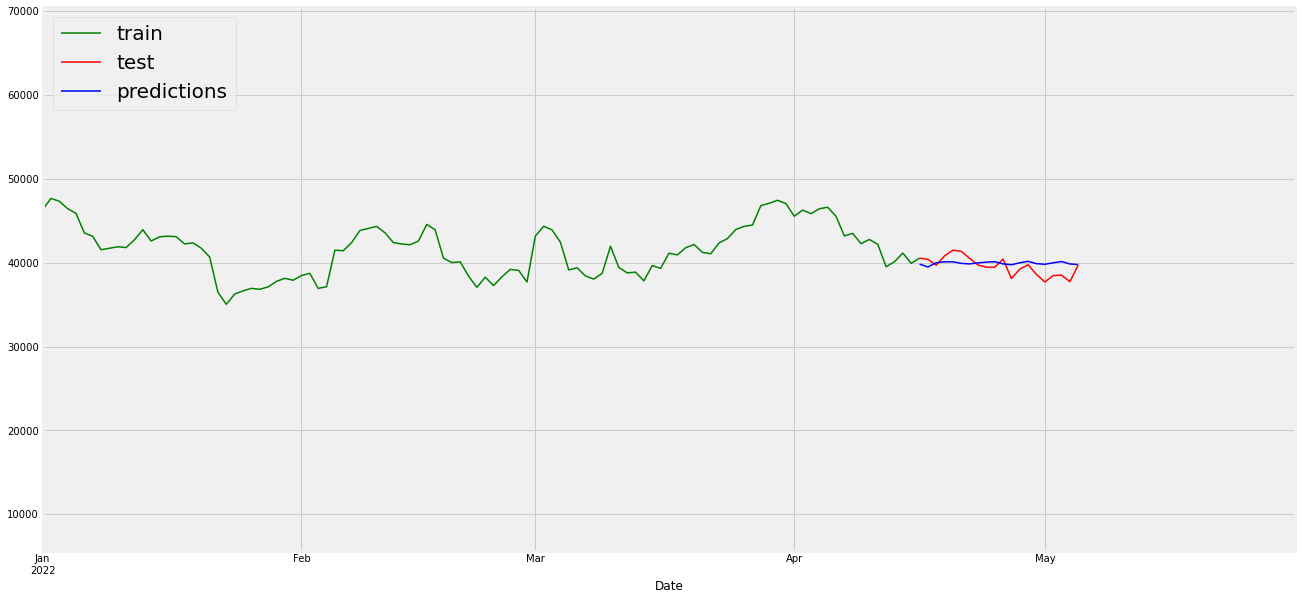

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
data_train['y'].plot(ax=ax, label='train', color = 'green')
data_test['y'].plot(ax=ax, label='test', color = 'red')
data_test['predictions'].plot(ax=ax, label='predictions', color = 'blue')
plt.xlim('2022-01-01','2022-05-31')
plt.legend(fontsize = 20, loc='upper left')
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(data_test['y'], data_test['predictions'])
print(f'MAE value: {mae_value}')

MAE value: 986.6972695119887


# Auto-TS API

In [44]:
# pip install pystan

In [45]:
#pip install fbprophet

In [46]:
#pip install auto-ts

In [47]:
#!pip install tscv

In [48]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [49]:
df['Date'] = pd.to_datetime(df['Date'])

In [50]:
df = df.sort_values('Date')

In [51]:
df

,Date,Open
0,2020-05-06,9007.441406
1,2020-05-07,9261.895508
2,2020-05-08,9936.162109
3,2020-05-09,9840.906250
4,2020-05-10,9591.168945
...,...,...
725,2022-05-01,37713.265625
726,2022-05-02,38472.187500
727,2022-05-03,38528.109375
728,2022-05-04,37748.011719


In [108]:
timestep = 50
train_df = df.iloc[:len(df)-timestep+1]
test_df = df.iloc[len(df)-timestep:]

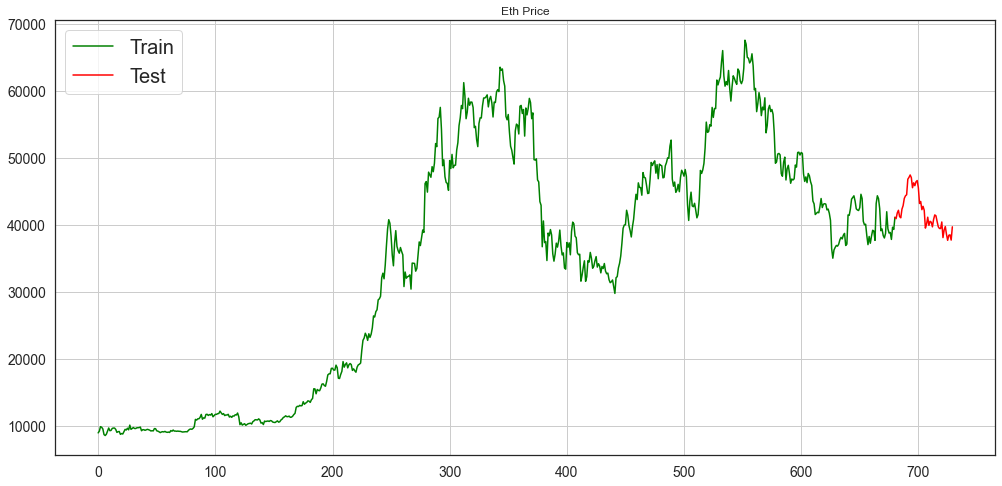

In [109]:
train_df.Open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Train', color = 'green')
test_df.Open.plot(figsize=(15,8), title= 'Eth Price', fontsize=14, label='Test', color='red')
plt.legend(fontsize = 20, loc='upper left')
plt.grid()
plt.show()

Start of Fit.....
    Target variable given as = Open
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Open']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (681, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train S

Cross-validated Score = 5002.551 in num rounds = 249
Time taken for Hyper Param tuning of XGBoost (in minutes) = 0.1
Top 10 features:
['Date_year', 'Open(t-1)', 'Date_quarter', 'Date_month', 'Date_dayofyear', 'Date_weekofyear', 'Date_dayofmonth', 'Date_dayofweek', 'Date_weekend']
    Time taken for training XGBoost on entire train data (in minutes) = 0.1
Returning the following:
    Model = <xgboost.core.Booster object at 0x0000017170A5C940>
    Scaler = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Open(t-1)', 'Date_hour',
                                                   'Date_minute',
                                                   'Date_dayofweek',
                                                   'Date_quarter', 'Date_month',
                                                   'Date_year',
            

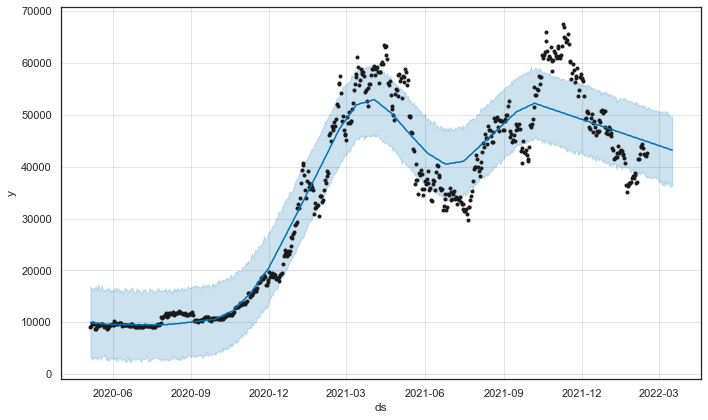

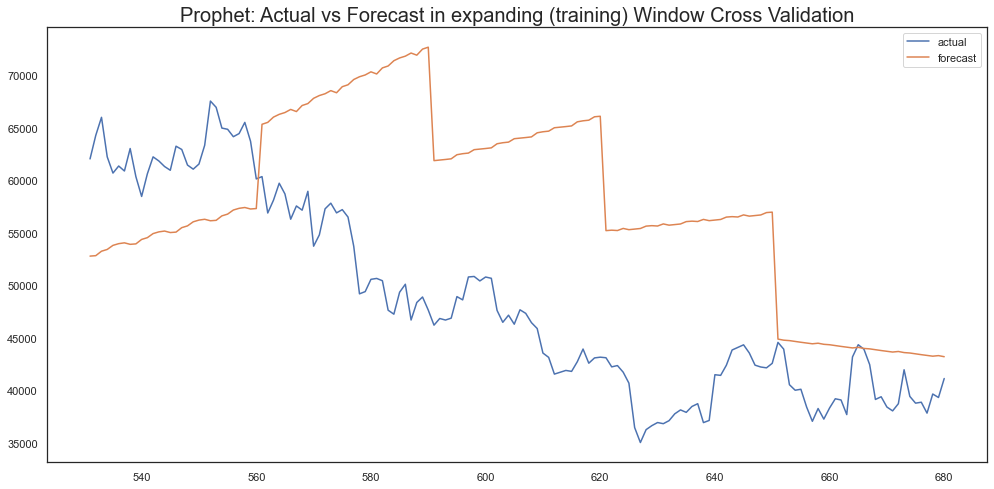

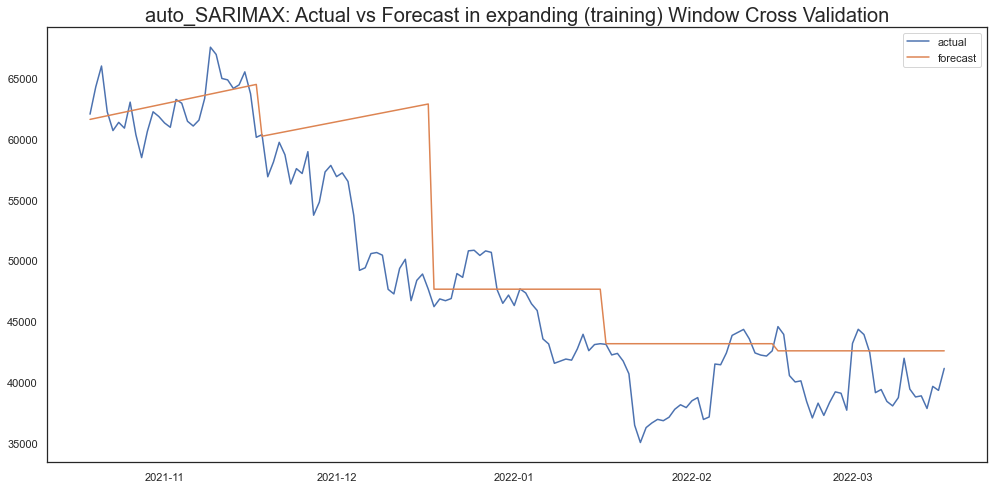

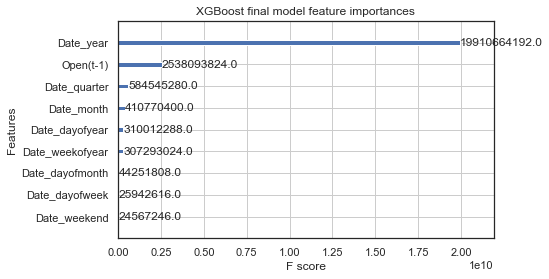

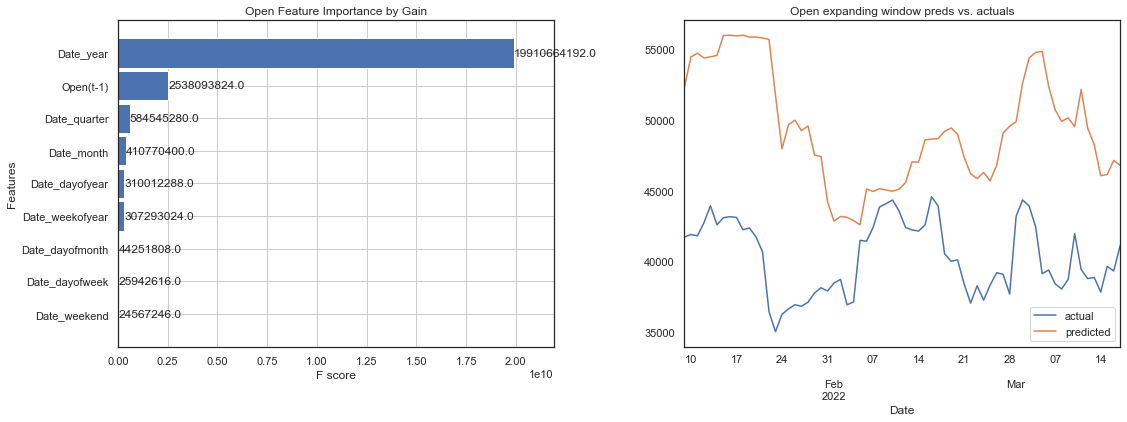

In [110]:
model = auto_timeseries(forecast_period=30, score_type='rmse', time_interval='D', model_type='best')
model.fit(traindata= train_df, ts_column="Date", target="Open")

<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

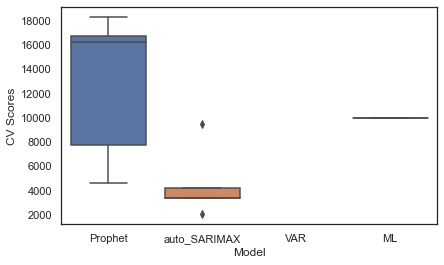

In [111]:
model.get_leaderboard()
model.plot_cv_scores()

In [112]:
future_predictions = model.predict(test_df)

Predicting using test dataframe as input for auto_SARIMAX model


In [113]:
future_predictions

Open,yhat,mean_se,mean_ci_lower,mean_ci_upper
2022-03-18,41105.388782,1510.130341,38145.587702,44065.189862
2022-03-19,41069.690907,2135.646809,36883.900077,45255.481736
2022-03-20,41033.750124,2615.622476,35907.224273,46160.275975
2022-03-21,40997.566434,3020.260682,35077.964274,46917.168594
2022-03-22,40961.139836,3376.754097,34342.823421,47579.456251
2022-03-23,40924.470331,3699.048780,33674.467945,48174.472717
2022-03-24,40887.557919,3995.429329,33056.660331,48718.455507
2022-03-25,40850.402599,4271.293618,32478.820940,49221.984257
2022-03-26,40813.004372,4530.391022,31933.601132,49692.407612
2022-03-27,40775.363237,4775.451441,31415.650403,50135.076071


In [114]:
test_df['predicted'] = future_predictions['yhat'].values

In [115]:
test_df

,Date,Open,predicted
680,2022-03-17,41140.843750,41105.388782
681,2022-03-18,40944.839844,41069.690907
682,2022-03-19,41794.648438,41033.750124
683,2022-03-20,42191.406250,40997.566434
684,2022-03-21,41246.132813,40961.139836
685,2022-03-22,41074.105469,40924.470331
686,2022-03-23,42364.378906,40887.557919
687,2022-03-24,42886.652344,40850.402599
688,2022-03-25,43964.546875,40813.004372
689,2022-03-26,44349.859375,40775.363237


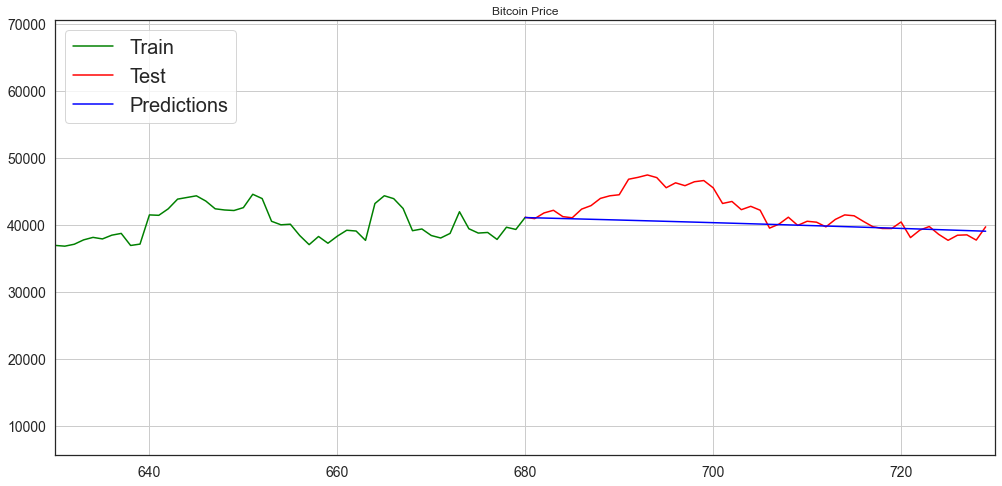

In [116]:
train_df.Open.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Train', color = 'green')
test_df.Open.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Test', color='red')
test_df.predicted.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Predictions', color='blue')
plt.legend(fontsize = 20, loc='upper left')
plt.xlim(len(df)-timestep*2, len(df))
plt.grid()
plt.show()

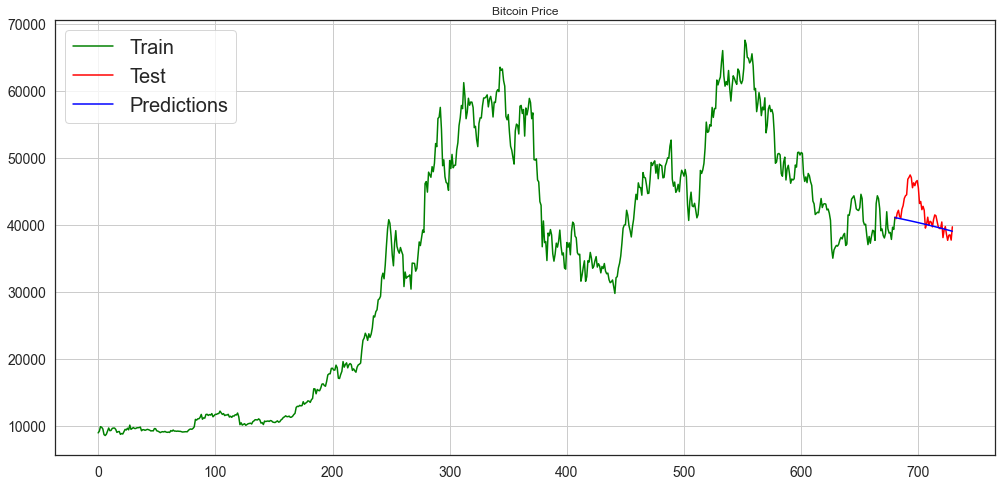

In [117]:
train_df.Open.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Train', color = 'green')
test_df.Open.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Test', color='red')
test_df.predicted.plot(figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label='Predictions', color='blue')
plt.legend(fontsize = 20, loc='upper left')
plt.grid()
plt.show()

In [118]:
from sklearn.metrics import mean_absolute_error
mae_value = mean_absolute_error(test_df['Open'], test_df['predicted'])
print(f'MAE value: {mae_value}')

MAE value: 2121.953249722863
